In [94]:
from scipy.io import loadmat
import pandas as pd
from scipy.io import loadmat
import numpy as np
from numpy.linalg import multi_dot, inv
import matplotlib.pyplot as plt
from scipy.sparse import diags
mat = loadmat("dataset1.mat")
print(mat.keys())
rows = mat['r']
print(mat.shape())
dataVal = mat['data']
data_dict = {}
for i,v in enumerate(rows):
    data_dict[v[0][0]] = dataVal[i]
df = pd.DataFrame(data=data_dict)

dict_keys(['__header__', '__version__', '__globals__', 'r', 'x_true', 't', 'v', 'l', 'r_var', 'v_var'])


AttributeError: 'dict' object has no attribute 'shape'

In [104]:
delta=1000
T = 0.1
mat = loadmat("dataset1.mat")
num_states = len(mat["r"])
num_samples = num_states//delta
t = np.array(mat["t"][delta::delta])
A_inv = np.linalg.inv(np.tril(np.ones((num_samples, num_samples))))
C = np.eye(num_samples)
r = np.array(mat["r"][delta::delta])
l = np.array(mat["l"])
y = l-r
x_true = np.array(mat["x_true"][delta::delta])
r_var = mat["r_var"][0,0]
R_inv = np.linalg.inv(np.diag([r_var]*num_samples))
v_var = mat["v_var"][0,0]
Q_inv = np.linalg.inv(np.diag([v_var]*num_samples))
u = mat["v"]
v = np.zeros((num_samples,1))
for i in range(delta,num_states,delta):
    v[int(i/delta-1)] = T*np.sum(u[i-delta:i])
z = np.vstack((v,y))  
H = np.concatenate((A_inv,C),axis = 0)
H_t = np.transpose(H)
W_inv = np.block([[Q_inv, np.zeros((num_samples, num_samples))],
                        [np.zeros((num_samples, num_samples)), R_inv]])
P_hat = inv(multi_dot([H_t,W_inv,H]))
sigma = np.sqrt(np.diag(P_hat))
x_estimate = multi_dot([P_hat,H_t,W_inv,z])
error = x_true-x_estimate


In [105]:
v

array([[ 0.16822704],
       [-0.27483428],
       [ 0.52152317],
       [ 0.42465216],
       [-0.8356252 ],
       [ 1.94484664],
       [-1.95864417],
       [-0.28344514],
       [ 2.160597  ],
       [-1.41837735],
       [-1.47951962],
       [ 2.37001217]])

<function matplotlib.pyplot.show(close=None, block=None)>

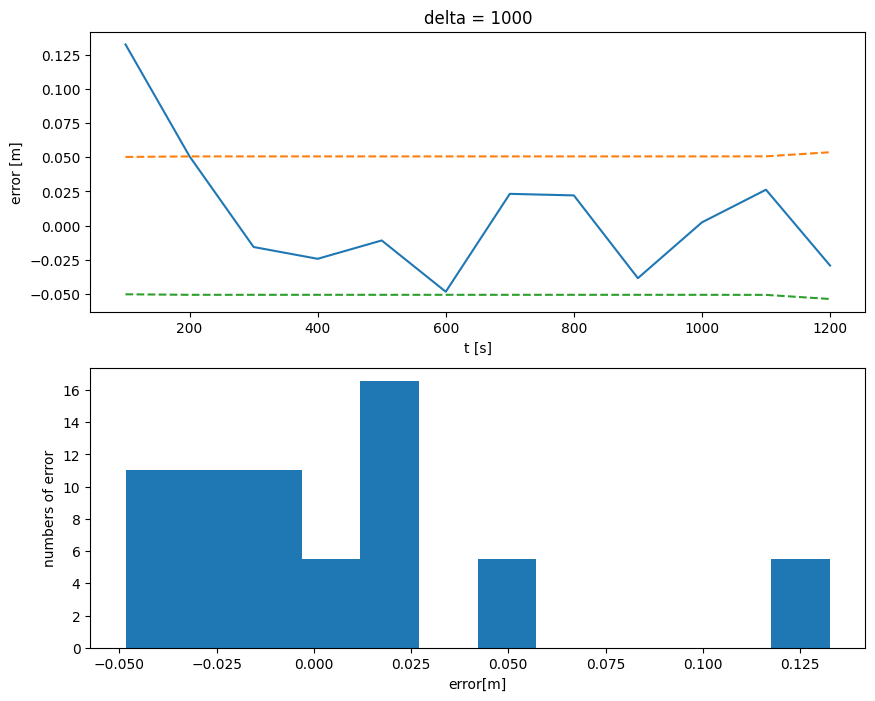

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8)) 
plt.subplot(2, 1, 1)
plt.plot(t,error,"-")
plt.plot(t,sigma*3,"--")
plt.plot(t,-sigma*3,"--")
plt.xlabel("t [s]")
plt.ylabel("error [m]")
plt.title(f"delta = {delta}")

plt.subplot(2, 1, 2)
plt.hist(error, bins = 20, density = True)
plt.xlabel("error[m]")
plt.ylabel("numbers of error")
plt.show 